In [1]:
import os
from src.dataPipeline import DataPipeline


os.chdir('..')

columns_to_drop_all = [
'Unnamed: 0.1', 'Unnamed: 0','Municipality','Living space',
'Plot area','Floor space','location','description',
'detailed_description','url','table','detail_responsive#municipality',
'detail_responsive#surface_living','detail_responsive#floor','detail_responsive#available_from',
'Gemeinde','Wohnfläche','Stockwerk','Nutzfläche','Verfügbarkeit','Grundstücksfläche',
'detail_responsive#surface_property','Commune','Surface habitable','Surface du terrain',
'Surface utile','Disponibilité','Étage','Comune','Superficie abitabile','Disponibilità',
'Piano','Superficie del terreno','Superficie utile','Municipality_merged',
'Floor_merged','Living_space_merged','Plot_area_merged','Availability_merged','location_parsed',
'title','price','address','link','details_structured','index',
'Locality','Zip','rooms','Floor_unified','Living_area_unified','space',
'price_s','address_s','Surface living:','Land area:',
'description_detailed','Floor space:','Volume:','plz','Number of toilets:','Gross yield:',
'Minimum floor space:','space_cleaned'

# Temporary columns
, 'Gross return'
, 'details'
, 'Room height:'
#, 'features'
, 'type'
, 'provider' ,
#'type_unified',
#'Availability',
#'Floor',
#'detail_responsive#surface_usable',
#'Floor_space_merged',
'lat',
'lon',
#'ForestDensityL',
#'ForestDensityM',
#'ForestDensityS',
'Latitude',
'Longitude',
#'NoisePollutionRailwayL',
#'NoisePollutionRailwayM',
#'NoisePollutionRailwayS',
#'NoisePollutionRoadL',
#'NoisePollutionRoadM',
#'NoisePollutionRoadS',
#'PopulationDensityL',
#'PopulationDensityM',
#'PopulationDensityS',
#'RiversAndLakesL',
#'RiversAndLakesM',
#'RiversAndLakesS',
#'WorkplaceDensityL',
#'WorkplaceDensityM',
#'WorkplaceDensityS',
#'distanceToTrainStation',
#'gde_area_agriculture_percentage',
#'gde_area_forest_percentage',
#'gde_area_nonproductive_percentage',
#'gde_area_settlement_percentage',
#'gde_average_house_hold',
#'gde_empty_apartments',
#'gde_foreigners_percentage',
#'gde_new_homes_per_1000',
'gde_politics_bdp',
'gde_politics_cvp',
'gde_politics_evp',
'gde_politics_fdp',
'gde_politics_glp',
'gde_politics_gps',
'gde_politics_pda',
'gde_politics_rights',
'gde_politics_sp',
'gde_politics_svp',
#'gde_pop_per_km2',
#'gde_population',
#'gde_private_apartments',
#'gde_social_help_quota',
#'gde_tax',
'gde_workers_sector1',
'gde_workers_sector2',
'gde_workers_sector3',
#'gde_workers_total',
'plz_parsed',
#'No. of rooms:',
'Number of apartments:',
#'Last refurbishment:',
#'Number of floors:',
#'Year built:',
#'Space extracted',
#'Plot_area_unified',

]
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, imputer=imputer, columns_to_drop=columns_to_drop_all)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:39: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:62: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:67: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer
from sklearn import linear_model


y = df['price_cleaned']
y = np.log(y)

X = df.drop(columns=['price_cleaned'])

# Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mapes = []
models = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = make_pipeline(
            SplineTransformer(n_knots=4, degree=3),
            linear_model.RidgeCV(alphas=np.linspace(0.01, 10, 100))
            )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred = np.exp(y_pred)
    y_test = np.exp(y_test)
    
    mape = mean_absolute_percentage_error(y_test, y_pred)*100
    mapes.append(mape)
    models.append(model)
    print(f'MAPE: {mape:.2f}%')

# Durchschnittlicher MAPE
average_mape = np.mean(mapes)
print(f'Durchschnittlicher MAPE über K-Folds: {average_mape:.2f}%')

MAPE: 41.86%
MAPE: 114.39%
MAPE: 57.09%
MAPE: 95.92%
MAPE: 46.83%
Durchschnittlicher MAPE über K-Folds: 71.22%


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


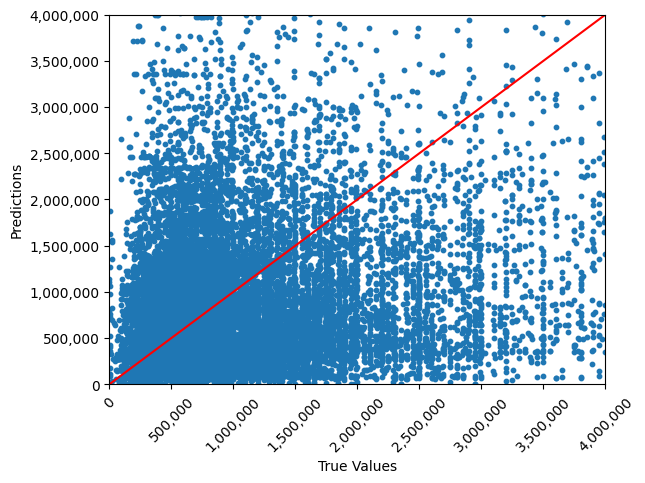

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

largest_num = 4e+6
model = models[2]


df_exclude = df.drop(columns=['price_cleaned'])

df_exclude = dp.scaler.transform(df_exclude)

df_exclude_np = df_exclude
output = model.predict(df_exclude_np)

output = np.exp(output)

plt.scatter(df['price_cleaned'], output, s=10, alpha=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.ylim([0, largest_num])
plt.xlim([0, largest_num])
plt.plot([0, largest_num], [0, largest_num], color='red')

# Set the axes to display whole numbers
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

In [4]:
model.score(X, y)

0.7201964742486959